# Plotting with Julia

- [Plots.jl](https://github.com/JuliaPlots/Plots.jl): powerful and convenient visualization. Multiple backends.
- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl): `matplotlib` in Julia.

## References

- [Plots.jl docs](http://docs.juliaplots.org/latest/)
- [Plots.jl Gallery](https://sosiristseng.github.io/plotsgallery-pluto/) in Pluto notebooks
- [PyPlot.jl Gallery](https://sosiristseng.github.io/pyplot-pluto/) in Pluto notebooks

In [1]:
using Plots

# Setup backend and default options (optional)
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
f(x) = sin(sin(x) + 1)

f (generic function with 1 method)

In [3]:
xs = 0.0:0.1:4pi

0.0:0.1:12.5

In [4]:
ys = f.(xs)

126-element Vector{Float64}:
 0.8414709848078965
 0.8911317861333838
 0.9315560826328598
 0.9623501813639228
 0.9835960588100923
 0.9958285928692856
 0.9999810651039218
 0.9973058625146969
 0.9892793281920914
 0.9775002586636391
 0.9635907245418334
 0.9491060405792519
 0.9354583090330478
 ⋮
 0.08058400266618558
 0.12422607398385804
 0.17624596561456454
 0.2357754296709225
 0.30169969146476955
 0.3726498227859906
 0.44701633928081586
 0.5229877415734713
 0.5986147895910303
 0.6718978181818495
 0.7408908673778799
 0.8038134083524772

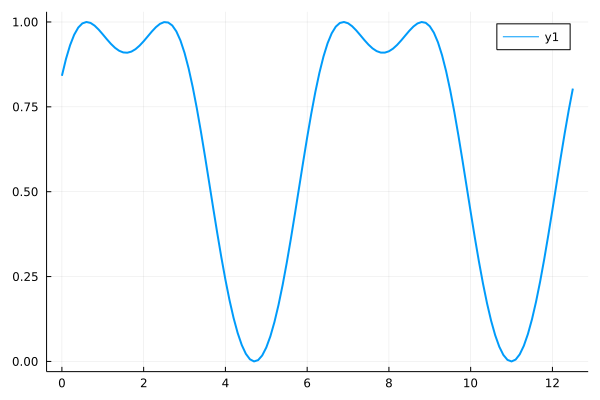

In [5]:
# Line plots connect the data points
plot(xs, ys)

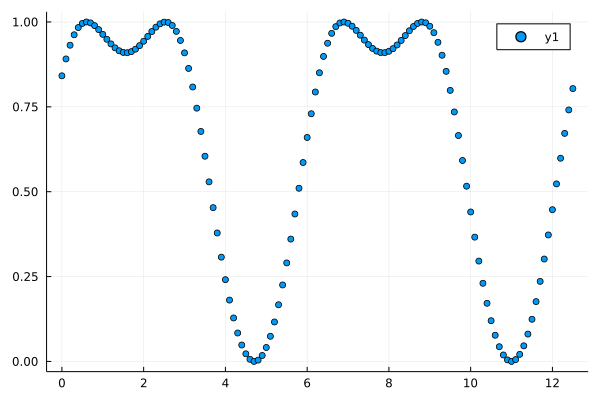

In [6]:
# scatter plots show the data points only
scatter(xs, ys)

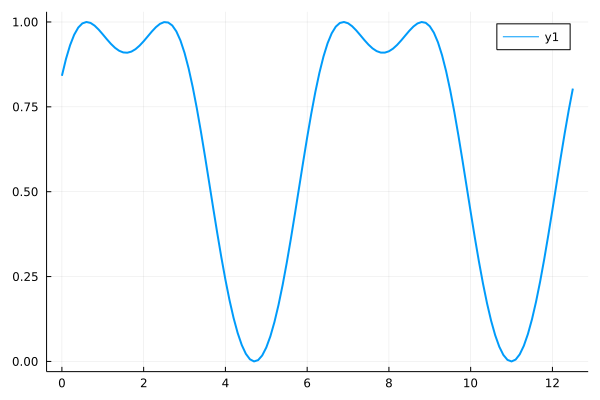

In [7]:
# you can plot functions directly
plot(f, xs)

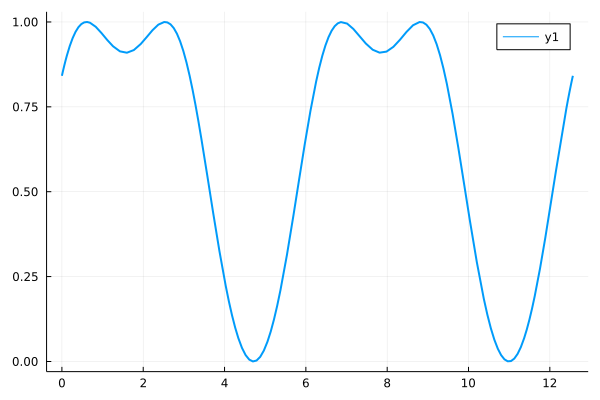

In [8]:
# plot a function with a range
plot(f, 0.0, 4pi)

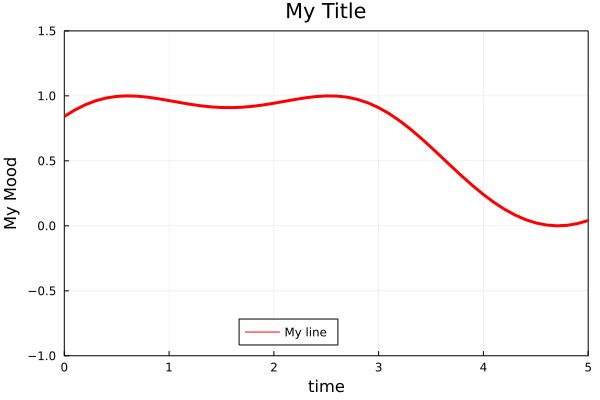

In [9]:
# Customizations
plot(f, xs, 
     label="My line", legend=:bottom, 
     title="My Title",  line=(:red, 3),
     xlim = (0.0, 5.0), ylim = (-1.0, 1.5),
     xlabel="time", ylabel="My Mood", border=:box)

Multiple series: each row is one observation; each column is a variable.

In [10]:
f2(x) = cos(cos(x) + 1)

f2 (generic function with 1 method)

In [11]:
y2 = f2.(xs)

126-element Vector{Float64}:
 -0.4161468365471424
 -0.4115989626245442
 -0.39793995394658593
 -0.37513292022522066
 -0.3431464165959406
 -0.3019964901426669
 -0.251799567898706
 -0.1928303905605429
 -0.12557796104012148
 -0.050791777273393006
  0.030489295156121407
  0.11693208142980759
  0.2069325218043063
  ⋮
  0.17637792096399765
  0.0873799893855719
  0.002506694401771309
 -0.07672453661400838
 -0.14907836040441386
 -0.21361508187450767
 -0.2696770419201289
 -0.31685309804973233
 -0.35492824797420097
 -0.38382617162484306
 -0.40355226239464964
 -0.41414381043612153

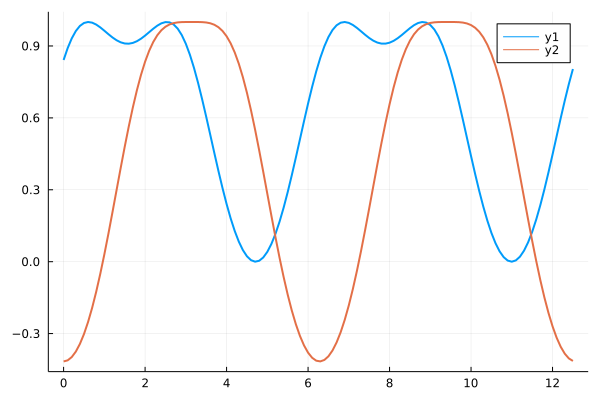

In [12]:
plot(xs, [ys y2])

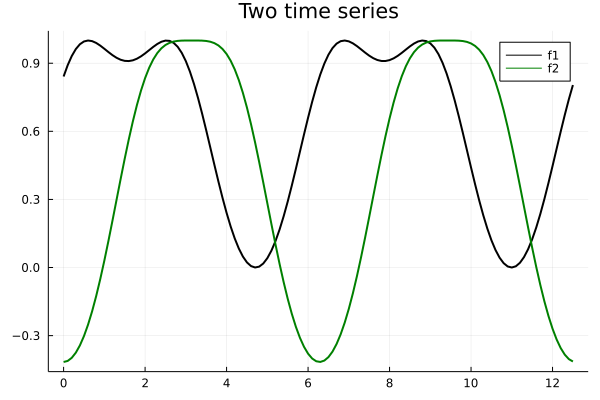

In [13]:
# Customizations
plot(xs, [f, f2], label=["f1" "f2"], lc=[:black :green], title="Two time series")

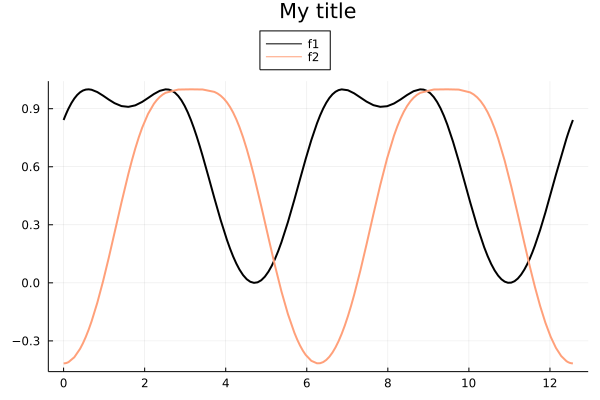

In [14]:
# Building the plot in multiple steps
# in the object-oriented way (recommended)

xMin = 0.0
xMax = 4.0pi
p1 = plot(f, xMin, xMax, label="f1", lc=:black)
plot!(p1 , f2, xMin, xMax, label="f2", lc=:lightsalmon)
plot!(p1, title = "My title", legend=:outertop)

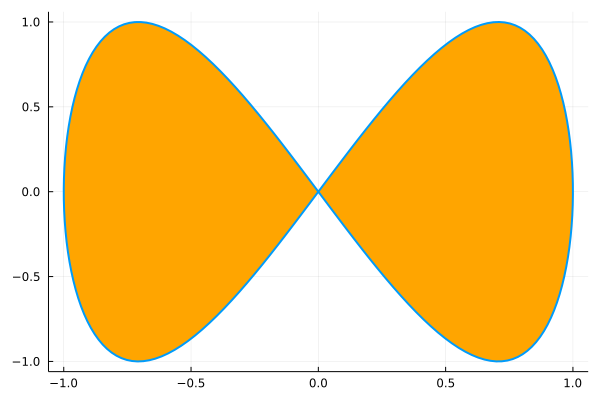

In [15]:
# Parametric function plot

xₜ(t) = sin(t)
yₜ(t) = sin(2t)

plot(xₜ, yₜ, 0, 2π, leg=false, fill=(0,:orange))

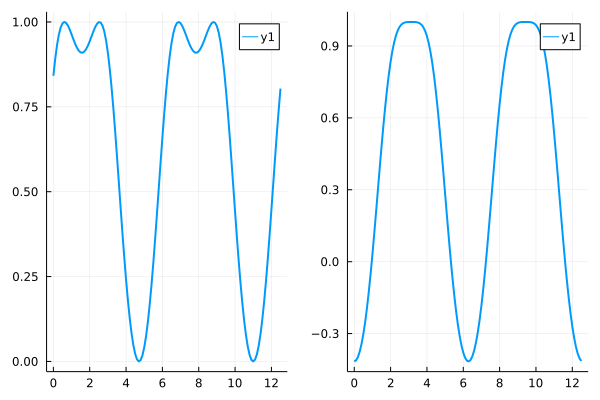

In [16]:
# Subplots

p1 = plot(f, xs)
p2 = plot(f2, xs)
plot(p1, p2)

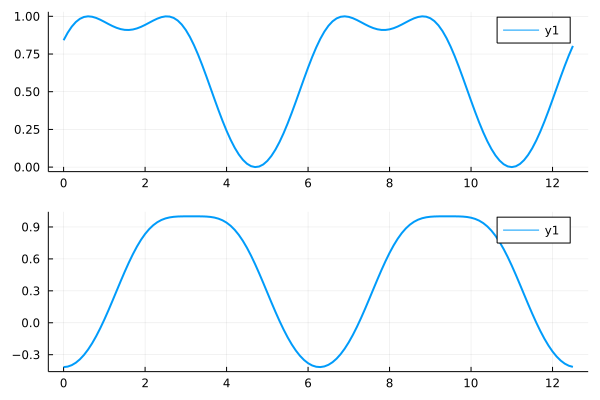

In [17]:
plot(p1, p2, layout=(2, 1))

# Solving differential equations in Julia

## Define your model

For example, the [SIR model](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) is a simple model of spreading of an contagious disease:

```math
\begin{align}
\frac{d}{dt}s(t) &= - \beta s(t)i(t)  \\
\frac{d}{dt}i(t) &= \beta s(t)i(t)  - \gamma i(t)  \\
\frac{d}{dt}r(t) &= \gamma i(t)
\end{align}
```

``s(t)`` is the proportion of susceptible people, ``i(t)`` is the proportion of infectious people, and ``r(t)`` is the proportion of recovered (or removed) people.

In [18]:
using Plots, DifferentialEquations
Plots.gr(fmt=:png, lw=2)

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1342


Plots.GRBackend()

In [19]:
function sir(u, p ,t)
	s, i, r = u
	β, γ = p
	v1 = β * s * i
	v2 = γ * i
	return [-v1, v1-v2, v2]
end

sir (generic function with 1 method)

## Parameters, initital conditions, and simulation time

In [20]:
p = (β = 1.0, γ = 0.3)
u0 = [0.99, 0.01, 0.00]  # s, i, r
tspan = (0.0, 20.0)      # Or 20.0 alone

(0.0, 20.0)

## In house algorithms

### The forward Euler method

In each step of the (forward) [Euler method](https://en.wikipedia.org/wiki/Euler_method), the next state variables ($\vec{u}_{n+1}$) are accumulated by the product of the time step (dt) and the derivatives at the current state ($\vec{u}_{n}$):

$$
\vec{u}_{n+1} = \vec{u}_{n} + dt \cdot f(\vec{u}_{n}, t_{n})
$$

In [21]:
# ODE stepper
step_euler(f, u, p, t, dt) = u .+ dt .* f(u, p, t)

step_euler (generic function with 1 method)

In [22]:
# in house ODE solver
function mysolve(f, u0, tspan, p; dt=0.1, stepper=step_euler)
    ts = tspan[1]:dt:tspan[end]
    us = zeros(length(ts), length(u0))
    us[1, :] .= u0
    for i in 1:length(ts)-1
        us[i+1, :] .= stepper(f, us[i, :], p, ts[i], dt)
    end
    return (t = ts, u = us)
end

mysolve (generic function with 1 method)

In [23]:
solFE = mysolve(sir, u0, tspan, p, dt=0.5, stepper=step_euler)

(t = 0.0:0.5:20.0, u = [0.99 0.01 0.0; 0.98505 0.01345 0.0015; … ; 0.035701322057320385 0.03093797683687704 0.9333607011058027; 0.03514905871989275 0.026849543648773115 0.9380013976313343])

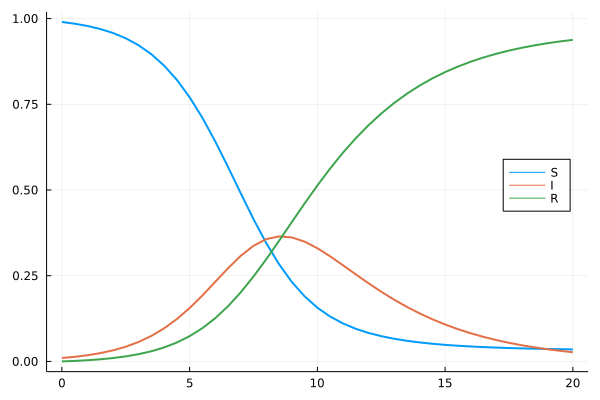

In [24]:
plot(solFE.t, solFE.u, label=["S" "I" "R"], legend=:right, )

### The fourth order Runge-Kutta (RK4) method

One of the most popular ODE-solving methods is the fourth order Runge-Kutta ([RK4](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)) method.

In each step, the next state is calculated in 5 steps with 4 intermediate steps.

$$
\begin{align}
k_1 &= dt \cdot f(\vec{u}_{n}, t_n)  \\
k_2 &= dt \cdot f(\vec{u}_{n} + 0.5k_1, t_n + 0.5dt)  \\
k_3 &= dt \cdot f(\vec{u}_{n} + 0.5k_2, t_n + 0.5dt)  \\
k_4 &= dt \cdot f(\vec{u}_{n} + k_3, t_n + dt)  \\
u_{n+1} &= \vec{u}_{n} + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align}
$$

In [25]:
step_rk4(f, u, p, t, dt) = """TODO"""

step_rk4 (generic function with 1 method)

## Use `DifferentialEquations.jl` package

In [26]:
prob = ODEProblem(sir, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 20.0)
u0: 3-element Vector{Float64}:
 0.99
 0.01
 0.0

In [27]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 17-element Vector{Float64}:
  0.0
  0.08921318693905478
  0.37028628396120217
  0.798425739836198
  1.323727172235353
  1.991841912229873
  2.792370687073497
  3.7547816703409254
  4.901904300447949
  6.260476672323744
  7.764891326110888
  9.390409921487866
 11.483861251927799
 13.372370386903762
 15.961358139120467
 18.681427997004675
 20.0
u: 17-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9890894703413342, 0.010634484617786016, 0.00027604504087978485]
 [0.985833159331863, 0.012901496935960089, 0.0012653437321769189]
 [0.9795270525087807, 0.017282421308893008, 0.0031905261823262565]
 [0.9689082161766913, 0.024631267424412875, 0.0064605163988957735]
 [0.9490552283472106, 0.038273389951902284, 0.012671381700887073]
 [0.9118629479768693, 0.06347250068466564, 0.024664551338465034]
 [0.839887103711126, 0.110781763668815, 0.04933113262005905]

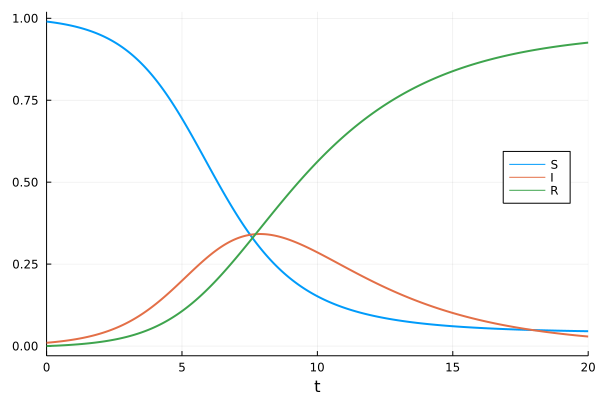

In [28]:
plot(sol, label=["S" "I" "R"], legend=:right)

# Gillespie Algorithm

In [29]:
using StatsBase # Weights() and sample()
using Random    # randexp()
using Plots

Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [30]:
#=
Stochastic chemical reaction: Gillespie Algorithm (direct method)
Adapted from: Chemical and Biomedical Enginnering Calculations Using Python Ch.4-3
=#
function ssa_direct(model, u0, tend, p, stoich; tstart=zero(tend))
    t = tstart   # Current time
    ts = [t]     # Time points
    u = copy(u0) # Current state
    us = copy(u) # Record of states
    while t < tend
        a = model(u, p, t)               # propensities
        dt = randexp() / sum(a)          # Time step
        du = sample(stoich, Weights(a))  # Choose the stoichiometry for the next reaction
        u .+= du  # Update state
        t += dt   # Update time
        
        us = [us u]  # Append state variable to record
        push!(ts, t) # Append time point to record
    end
    # Trasnpose to make column as variables, rows as observations
    us = collect(us')
    return (t = ts, u = us)
end

ssa_direct (generic function with 1 method)

In [31]:
#=
Stochastic chemical reaction: Gillespie Algorithm (first reaction method)
Adapted from: Chemical and Biomedical Enginnering Calculations Using Python Ch.4-3
=#
function ssa_first(model, u0, tend, p, stoich; tstart=zero(tend))
    t = tstart   # Current time
    ts = [t]     # Time points
    u = copy(u0) # Current state
    us = copy(u) # Record of states
    while t < tend
        a = model(u, p, t)  # propensities of reactions
        # dts from all reactions
        dts = randexp(length(a)) ./ a
        # Choose the reaction 
        i = argmin(dts)
        dt = dts[i]
        du = stoich[i]
        # Update state and time
        u .+= du
        t += dt
        us = [us u]  # Append state variable to record
        push!(ts, t) # Append time point to record
    end
    # Make column as variables, rows as observations
    us = collect(us')
    return (t = ts, u = us)
end

ssa_first (generic function with 1 method)

In [32]:
#=
Reaction of A <-> B with rate constants k1 & k2
=#
"Propensity model for this reaction"
model(u, p, t) = [p.k1 * u[1],  p.k2 * u[2]]

model

In [33]:
parameters = (k1=1.0, k2=0.5, stoich=[[-1, 1], [1, -1]])
u0 = [200, 0]
tend = 10.0

soldirect = ssa_direct(model, u0, tend, parameters, parameters.stoich)
solfirst = ssa_first(model, u0, tend, parameters, parameters.stoich)

(t = [0.0, 6.44086103056645e-5, 0.004983667847179366, 0.009969665089838722, 0.011534338340560543, 0.014954448267146876, 0.023585578796020856, 0.0353156481617731, 0.04758116859176169, 0.05400095297659646  …  9.965297229207598, 9.96981214144863, 9.970164790315465, 9.970838925280079, 9.973605211548042, 9.976125704995098, 9.985503174709738, 9.992325651568285, 9.992769822211374, 10.003903240992551], u = [200 0; 199 1; … ; 69 131; 68 132])

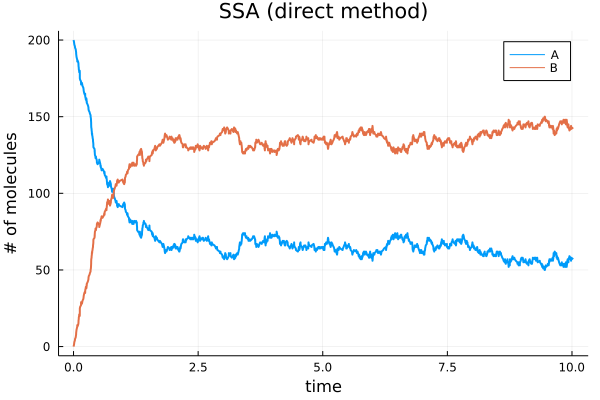

In [34]:
plot(soldirect.t, soldirect.u, xlabel="time", ylabel="# of molecules", title = "SSA (direct method)", label=["A" "B"])

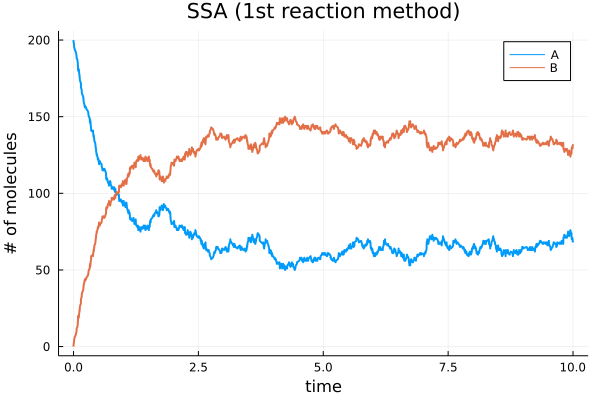

In [35]:
plot(solfirst.t, solfirst.u, xlabel="time", ylabel="# of molecules", title = "SSA (1st reaction method)", label=["A" "B"])

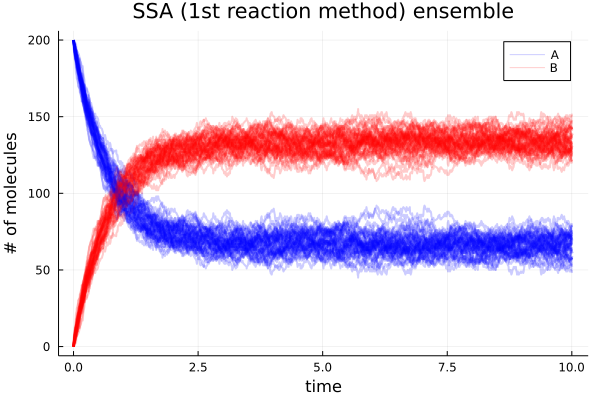

In [36]:
# Running an ensemble of simulations
numRuns = 50
sol = ssa_direct(model, u0, tend, parameters, parameters.stoich)
p = plot(sol.t, sol.u, linecolor=[:blue :red], label=["A" "B"], linealpha=0.2,
    xlabel="time", ylabel="# of molecules", 
    title = "SSA (1st reaction method) ensemble")
for i in 1:numRuns-1
    sol = ssa_direct(model, u0, tend, parameters, parameters.stoich)
    plot!(p, sol.t, sol.u, linecolor=[:blue :red], linealpha=0.2, label=false)
end

p